Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 9</span>


Write a code to solve the TSP with a **Genetic** algorithm (GA). Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ of the best path and of $\langle L^{(2)}\rangle$, averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates


The GA program follows the following steps:

1. Creates the map randomly placing the cities in the required domain
2. Generate a population of 50 individuals, assigning to each a random path with a fixed starting point
3. Starts the GA loop, which consists of selection, mutation and crossing over

The GA parameters are:
- selection power: which determines how dependent on the rank (the position in the sorted population) the selection will be. The lowest this value, the most diverse the population will be.
- mutation acceptance: which sets the probability of accepting a mutation.
- crossing over acceptance: which sets the probability of performing crossing over on an individual.
- number of generations: how long the GA loop will run for (no early breaking condition has been set).
- number of salesmen: how large the population is. This can be challenging to set as a very large population will have a broader exploration of the possible paths, but it can be computationally heavy

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sys  # To read the filename from command line

# Function to read the data from the file using NumPy
def print_path(filepath):
# Using numpy to read the data
	data = np.loadtxt(filepath, comments="#")
	# Split data into x and y coordinates
	x_coords = data[:, 0]
	y_coords = data[:, 1]
	# Create the plot
	plt.figure(figsize=(8, 8))
	plt.scatter(x_coords, y_coords, color='blue', label='Cities')
	# Connect the points with lines
	plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1)
	#Connect the last point back to the first
	plt.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], color='red', linestyle='-', linewidth=1)
	# Labels and title
	plt.xlabel('X Coordinate')
	plt.ylabel('Y Coordinate')
	plt.title('Best Salesman Path')
	plt.legend()
	plt.show()

def printBest(filepath_half, filepath_best):
	# load best half and best individual data
	half = np.loadtxt(filepath_half);
	best = np.loadtxt(filepath_best);
	x = np.linspace(0, len(best), len(best));
	# Create the plot
	plt.figure(figsize=(10, 6))
	plt.plot(x, half, color='blue', linestyle='-', linewidth=1, label="best half")
	plt.plot(x, best, color='green', linestyle='-', linewidth=1, label="best individual")
	# Labels and title
	plt.xlabel('generation')
	plt.ylabel('distance')
	plt.title('Best distance')
	plt.legend()
	plt.show()

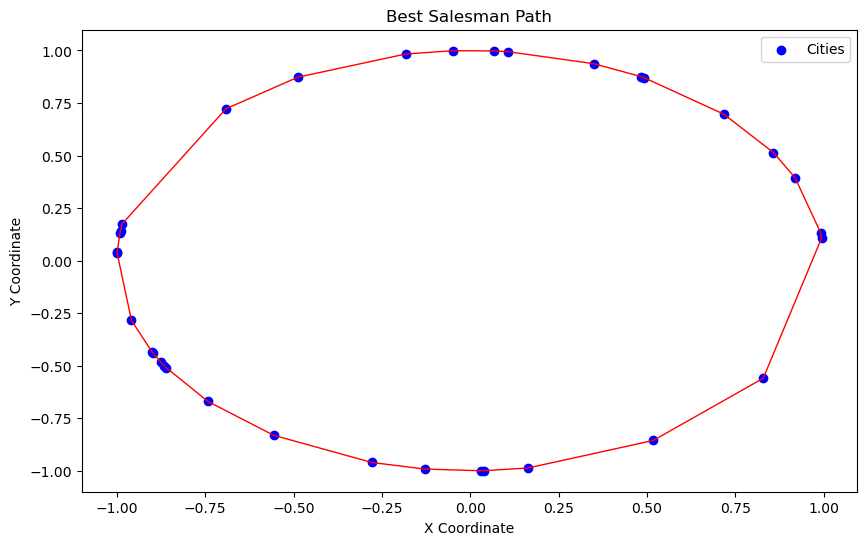

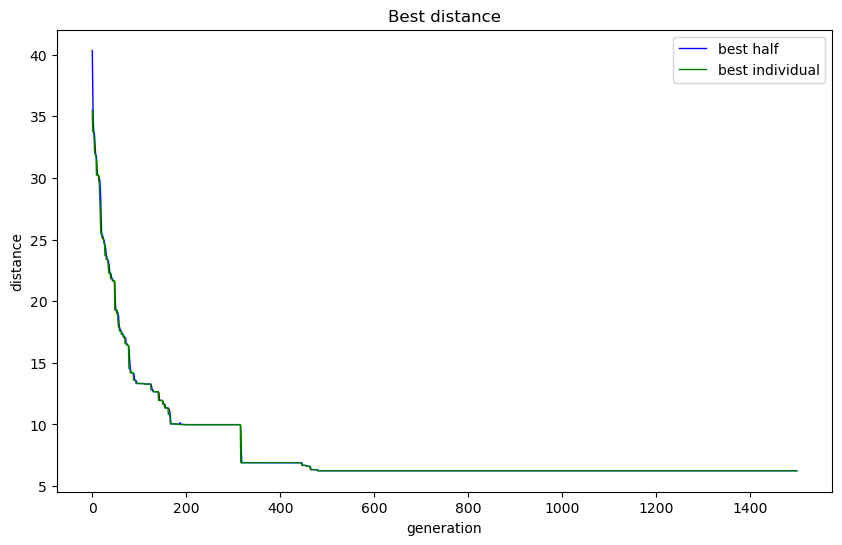

In [28]:
filepath = "./OUTPUT/best_circle.dat"
print_path(filepath)
printBest("./OUTPUT/circle_bestHalf.dat", "./OUTPUT/circle_best_individual.dat")

The best path is obviously to travel the circumference loop, which the program finds very quickly.

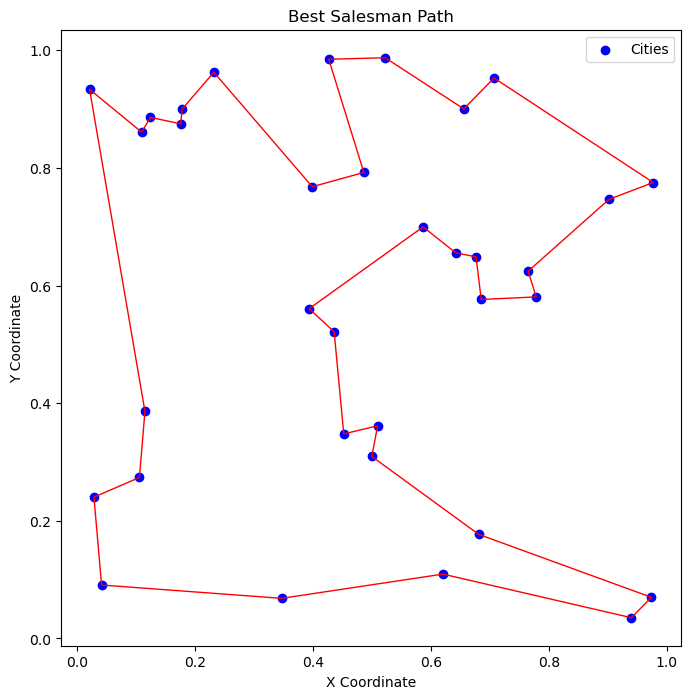

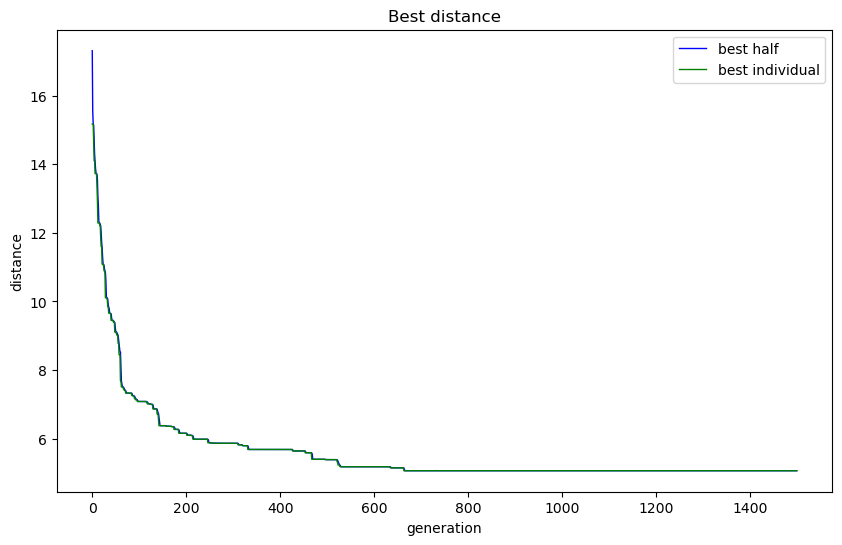

In [34]:
filepath = "./OUTPUT/best_square.dat"
print_path(filepath)
printBest("./OUTPUT/square_bestHalf.dat", "./OUTPUT/square_best_individual.dat")

As the plot shows, the population follows the best individual (too) perfectly. Although this is not optimal for diversity, it lead to the best and fastest result. For other instances it might not be the case and the selection and mutation parameters could benefit from different tuning. Another instance to bear in mind is the small number of salesmen that were used for the search, only 50, which doesn't allow for much variance in the population.